### COGS118A HW3 

### 1) Convex

#### a) convex
#### b) Not convex
#### c) Convex
#### d) Not convex
#### e) Not convex
#### f) Not convex


### 2) Least Square Estimation

#### (a) Compute the gradient of g(W) with respect to W.

$$g(W) = (XW-Y)^T(XW-Y)$$
$$g(W) = W^TX^TXW - W^TX^TY - Y^TXW + Y^TY$$
$$ \frac{d}{dW} (W^TX^TXW - W^TX^TY - Y^TXW + Y^TY)$$
$$ \frac{dg(W)}{dW} = 2X^TXW - 2X^TY $$

#### b)   By setting the answer of part (a) to 0, prove the following:

$$ \frac{dg(W)}{dW} = 2X^TXW - 2X^TY = 0$$
$$ 2X^TXW - 2X^TY = 0$$
$$ W = \frac{2X^TY}{2X^TX} $$
$$ W = \frac{X^TY}{X^TX} $$
$$ W^* = \frac{X^TY}{X^TX} = (X^TX)^{-1} (X^TY) $$

#### c)  Python: Download the file HW3.ipynb from the course website. Then, complete the TODO blocks in the Jupyter notebook.

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
# Import packages and load data
X_and_Y = np.load('./q2-least-square.npy')
X = X_and_Y[:, 0]  # Shape: (300,)
Y = X_and_Y[:, 1]  # Shape: (300,)

### 2.1: 2D Scatterplot


Text(0,0.5,'Y')

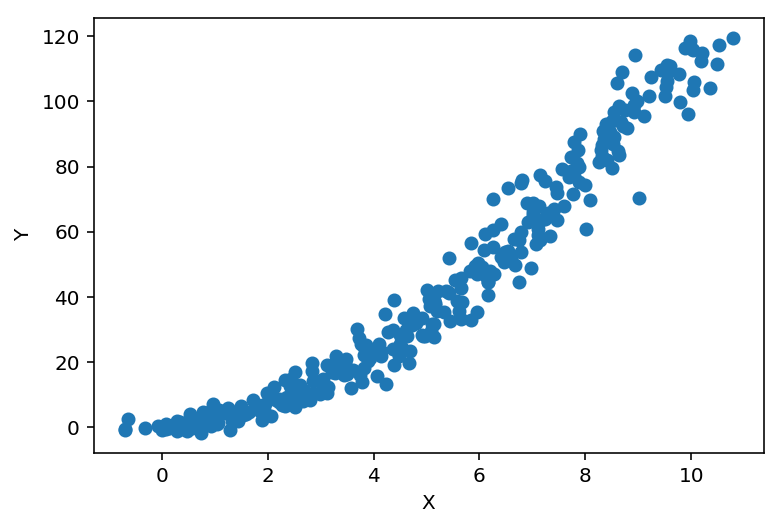

In [3]:
# TODO: Plot the a scatter graph of data.
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')

#### 2.2: Compute the Least Sequare Line Using the Closed Form (Example Code)

In [4]:
# Compute the least square line over the given data
# Assume Y = w0 + w1 * X = (w0, w1).(1, X) = W.X1
# You might find the following functions useful: np.matrix, np.hstack, np.ones, reshape, dot

X1 = np.matrix(np.hstack((np.ones((len(X),1)), X.reshape(-1,1))))
W = np.dot(np.dot(inv(np.dot(np.transpose(X1), X1)), np.transpose(X1)), Y)
w0 = (W.item((0, 0)))
w1 = (W.item((0, 1)))
print('Y = {:.2f} + {:.2f}*X'.format(w0, w1))

Y = -15.47 + 11.61*X


### 2.3: 2D Scatterplot & the Estimated Least Square Line

Text(0,0.5,'Y')

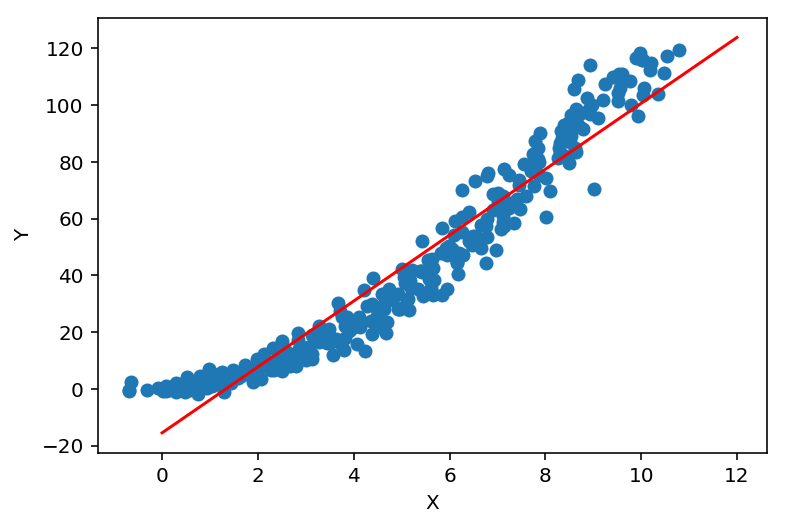

In [5]:
# TODO 3.  Plot the the estimated least square line on top of the scatter plot in (2).  
# The scatterplot and the line should be in the same figure.
plt.scatter(X, Y)
plt.plot(np.linspace(0,12,10), (w0 + w1 * np.linspace(0,12,10)), color='r')
plt.xlabel('X')
plt.ylabel('Y')

### 2.4: Compute the Least Square Parabola Using the Closed Form

In [6]:
# TODO 4. Compute the least square parabola over the given data
# Assume Y = w0 + w1 * X + w2 * X^2 = (w0, w1, w2).(1, X, X^2) = W.X2
X2 = np.matrix(np.hstack((np.ones((len(X),1)), X.reshape(-1,1), np.square(X.reshape(-1,1)))))
W = np.dot(np.dot(inv(np.dot(np.transpose(X2), X2)), np.transpose(X2)), Y)
print(W.shape)
w0 = (W.item((0, 0)))
w1 = (W.item((0, 1)))
w2 = (W.item((0, 2)))
print('Y = {:.2f} + {:.2f}*X + {:.2f}*X^2'.format(w0, w1, w2))

(1, 3)
Y = -1.71 + 3.02*X + 0.87*X^2


### 2.5: 2D Scatterplot & the Estimated Parabola

Text(0,0.5,'Y')

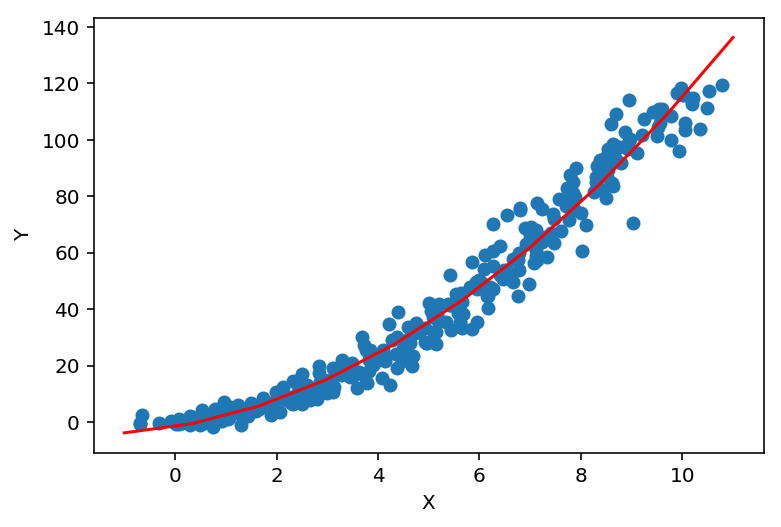

In [7]:
# TODO 5.  Plot the the estimated parabola on top of the scatter plot in (2). 
# The scatterplotand the parabola should be in the same figure
plt.scatter(X, Y)
plt.plot(np.linspace(-1,11,10), (w0 + w1 * np.linspace(-1,11,10) + w2 * (np.linspace(-1,11,10)**2)), color='r')
plt.xlabel('X')
plt.ylabel('Y')

### 3)  Least Square Estimation via Gradient Descent

In [8]:
from mpl_toolkits.mplot3d import Axes3D
%config InlineBackend.figure_format = 'retina'

In [9]:
# Import packages and load data
X_and_Y = np.load('./q3-gradient-descent.npy')
X1 = X_and_Y[:, 0]    # Shape: (900,)
X2 = X_and_Y[:, 1]    # Shape: (900,)
Y  = X_and_Y[:, 2]    # Shape: (900,)
print(X1.shape, X2.shape, Y.shape)

(900,) (900,) (900,)


### 3.1: 3D Scatterplot

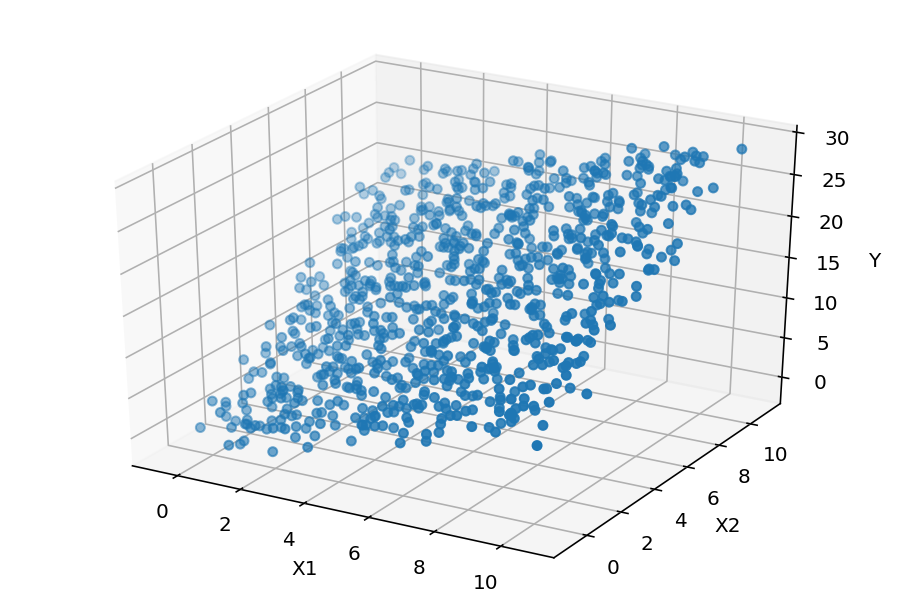

In [10]:
# TODO: Plot the a scatter graph of data.
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X1, X2, Y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

### 3.2 Compute the Least Square Plane Using the Closed Form

In [11]:
# TODO: Compute the least square Plane over the given data
# Assume Y = w0 + w1 * X1 + W2 * X2 = (w0, w1, w2).(1, X1, X2) = W.X
X = np.matrix(np.hstack((np.ones((len(X1),1)), X1.reshape(-1,1), X2.reshape(-1,1))))
W = np.dot(np.dot(inv(np.dot(np.transpose(X), X)), np.transpose(X)), Y)
w0 = (W.item((0, 0)))
w1 = (W.item((0, 1)))
w2 = (W.item((0, 2)))
print('Y = {:.2f} + {:.2f}*X1 + {:.2f}*X2'.format(w0, w1, w2))

Y = -0.70 + 0.98*X1 + 1.94*X2


### 3.3: 3D Scatterplot & the Estimated Least Square Plane

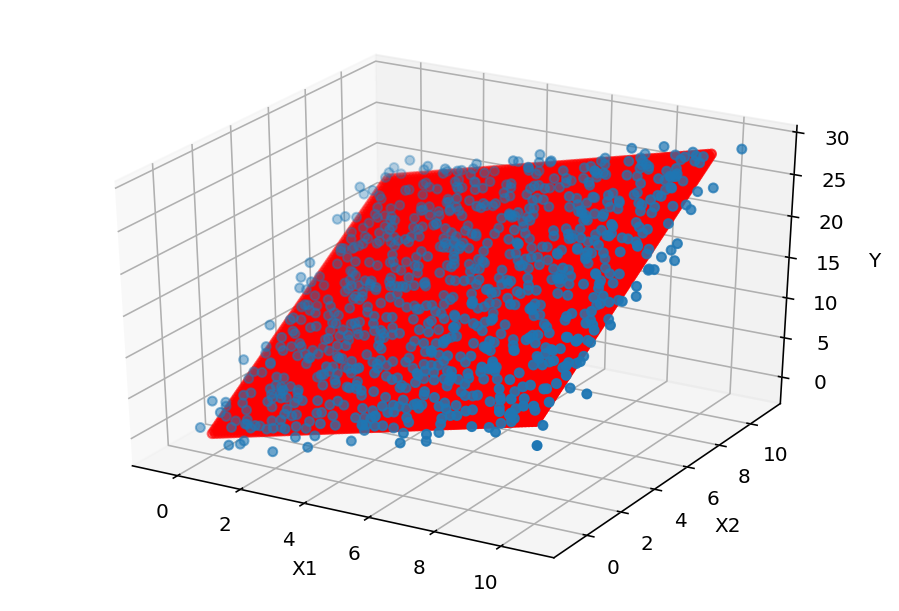

In [29]:
# TODO: Plot the scatter graph of data and estimated plane using the closed form solution.
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X1, X2, Y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
X1_plane, X2_plane = np.meshgrid(np.linspace(0,10,100), np.linspace(0,10,100))
Y_plane = w0 + w1 * X1_plane + w2 * X2_plane
ax.scatter(X1_plane, X2_plane, Y_plane, c='r')
plt.show()

### 3.4: Compute the gradient of g(W) with respect to W.

In [13]:
# TODO: g'(W)
def g_prime_W(X, Y, W):
    return (2*np.dot(np.dot(np.transpose(X),X), W) - 2*(np.dot(np.transpose(X),Y)))

In [21]:
W = np.matrix(np.zeros((3,1)))
Y = Y.reshape(-1, 1)
learning_rate = .00001
itr = [0]
g_W = [np.dot(np.transpose(np.dot(X,W) - Y), (np.dot(X,W) - Y))]
for i in range(10000):
        dW = g_prime_W(X, Y, W)
        Wnew = W - learning_rate * dW
        
        g_W.append(np.dot(np.transpose(np.dot(X,Wnew) - Y), (np.dot(X,Wnew) - Y)))
        
        itr.append(i+1)
        
        if np.linalg.norm(Wnew - W, ord = 1) < 0.0000001:
            break
        W = Wnew

w0 = (W.item((0, 0)))
w1 = (W.item((1, 0)))
w2 = (W.item((2, 0)))
print('Y = {:.2f} + {:.2f}*X1 + {:.2f}*X2'.format(w0, w1, w2))

Y = -0.70 + 0.98*X1 + 1.94*X2


### 3.6 Plot the training curve

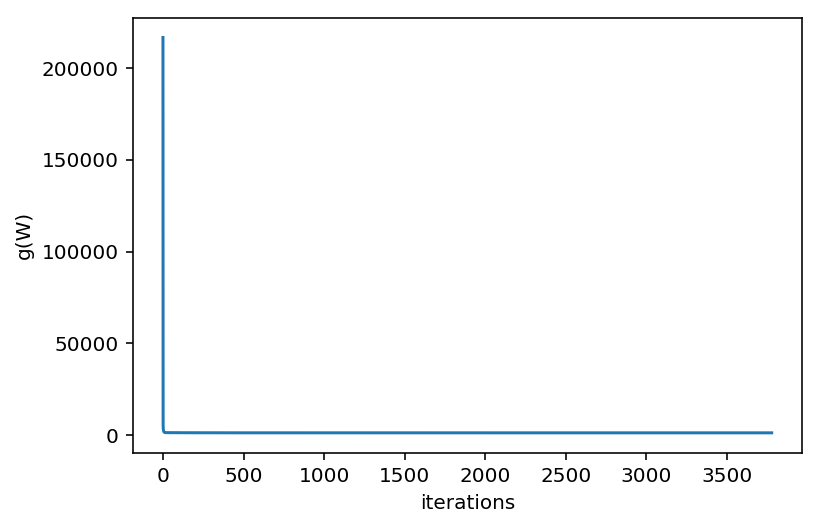

In [22]:
plt.xlabel('iterations')
plt.ylabel('g(W)')
plt.plot(itr, np.array(g_W).reshape(-1, 1))
plt.show()

### 3.7 Plot the scatter graph of data and estimated plane using the gradient descent solution

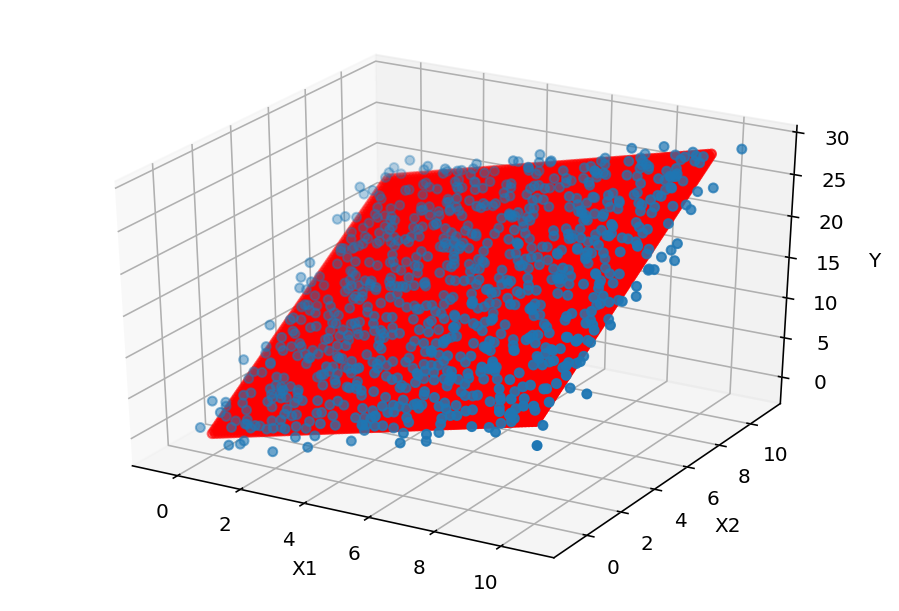

In [30]:
# TODO: Plot the scatter graph of data and estimated plane
X1_plane, X2_plane = np.meshgrid(np.linspace(0,10,100), np.linspace(0,10,100))
Y_plane = w0 + w1 * X1_plane + w2 * X2_plane
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X1, X2, Y)
ax.scatter(X1_plane, X2_plane, Y_plane, c='r')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

### 4) Concepts
#### Select the correct option(s). Note that there might be multiple correct options.
#### 1. What are the most significant difference between regression and classification? 
A. unsupervised learning vs. supervised learning

B. prediction of continuous values vs. prediction of class labels $\rightarrow TRUE$

C. least square estimation vs. gradient descent 

D. convex vs. non-convex problem E. higher vs. lower error $\rightarrow TRUE$

#### 2. What are true about solving regression problem with gradient descent compared to closed-form solution?
A. matrix inverse could be expensive when the dataset is large $\rightarrow TRUE$

B. gradient descent is slower

C. gradient descent will give you the exactly the same result as closed-form solution

D. it’s hard to set a good learning rate for gradient descent 

#### 3. Is gradient descent guaranteed to find the global optimal in a convex problem? What about non-convex problem?
A. yes for a convex problem

B. no for a convex problem $\rightarrow TRUE$

C. yes for a non-convex problem $\rightarrow TRUE$

D. no for a non-convex problem

#### 4. What are true about local optimal and global optimal? 
A. local optimal is better 

B. There can exist multiple local optimal $\rightarrow TRUE$

C. gradient descent is able to find the global optimal  $\rightarrow TRUE$

D. least square solution finds the global optimal